# Evaluacion de tiempo y distancia para llegar desde un punto origen A a un destino B basado en  Waze, A y B son datos de coordenadas

In [2]:
import WazeRouteCalculator
import time
region = 'EU'

from_address = '-12.021144, -77.113573'
to_address = '-12.068736, -77.077902'

route = WazeRouteCalculator.WazeRouteCalculator(from_address, to_address, region, log_lvl=None)
route_time, route_distance = route.calc_route_info()
h=int(route_time/60)
b = abs(route_time/60) - abs(int(route_time/60))
m=int(b*60)
print('R: Aeropuerto Jorge Chavez --> PUCP, Coordenadas Origen: ',from_address,' Destino: ', to_address )
print('El tiempo estimado es: ', h, 'horas ', m, ' minuntos')
print('La distancia estimada es: ', route_distance, 'Km')
archivo=open("Lista_Waze3.CSV","a")
archivo.write('R:Lima-Aeropuerto-PUCP')
archivo.write(",")
archivo.write(time.strftime("%H:%M:%S"))
archivo.write(",")
archivo.write(str(h))
archivo.write(",")
archivo.write(str(m))
archivo.write(",")
archivo.write(str(route_distance))
archivo.write(",")
archivo.write("\n")
print('Hora calculada>> ', time.strftime("%H:%M:%S"))

R: Aeropuerto Jorge Chavez --> PUCP, Coordenadas Origen:  -12.021144, -77.113573  Destino:  -12.068736, -77.077902
El tiempo estimado es:  0 horas  18  minuntos
La distancia estimada es:  8.65 Km
Hora calculada>>  23:00:29


In [3]:
import osmnx as ox
north, south, east, west = -12.005120,  -12.080921, -77.070369 ,  -77.124513
G2 = ox.graph_from_bbox(north, south, east, west, network_type='drive')
G22=ox.graph_from_bbox(north, south, east, west, network_type='drive')  
print('Listo')


Listo


# Extracción de redes urbanas y calculo de rutas cortas usando Algoritmo de Dijkstra

In [4]:
import networkx as nx
import numpy as np
import osmnx as ox
from sklearn.neighbors import KDTree
import folium
import matplotlib.pyplot as plt
print('Ruta: Aeropuerto Jorge Chavez --> PUCP-Perú *Sin Interrupcion')

ini1=ox.geocode(from_address)
des1=ox.geocode(to_address)
nodes, _ = ox.graph_to_gdfs(G2)
nodes.head()
tree = KDTree(nodes[['y', 'x']], metric='euclidean')
ini1_idx = tree.query([ini1], k=1, return_distance=False)[0]
des1_idx = tree.query([des1], k=1, return_distance=False)[0]
closest_node_to_ini1 = nodes.iloc[ini1_idx].index.values[0]
closest_node_to_des1 = nodes.iloc[des1_idx].index.values[0]

route = nx.shortest_path(G2, closest_node_to_ini1, closest_node_to_des1)
#route = WazeRouteCalculator.WazeRouteCalculator(from_address, to_address, region, log_lvl=None)
route_time, route_distance = route.calc_route_info()                              
print('listo')

Ruta: Aeropuerto Jorge Chavez --> PUCP-Perú *Sin Interrupcion


AttributeError: 'list' object has no attribute 'calc_route_info'

Distancia >>  8.25 Km.


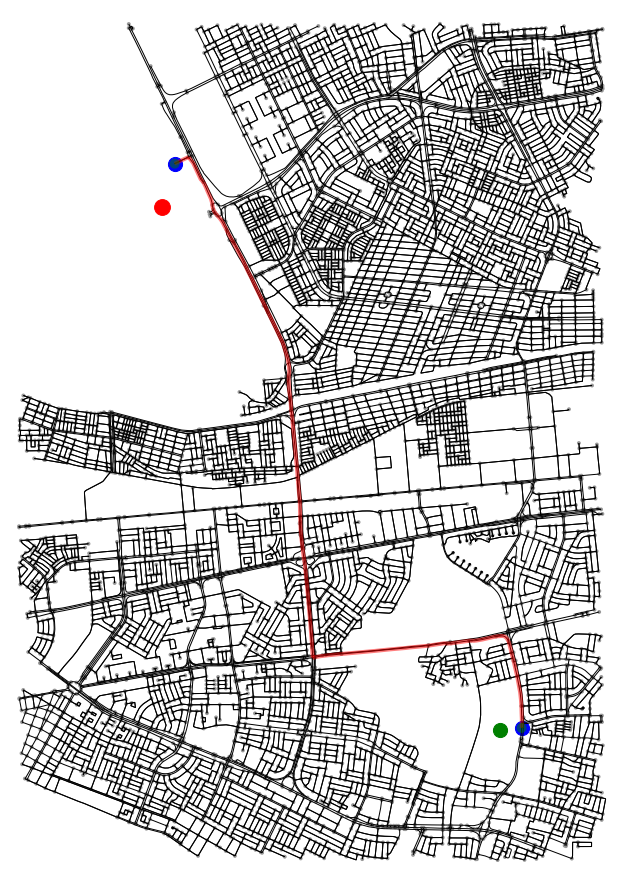

In [87]:
fig, ax = ox.plot_graph_route(G2, route, fig_height=16, 
                              fig_width=14, 
                              show=False, close=False, 
                              edge_color='black',
                              orig_dest_node_color='green',
                              route_color='red')

ax.scatter(ini1[1], ini1[0], c='red', s=250)
ax.scatter(des1[1], des1[0], c='green', s=200)


ax.scatter(G2.node[closest_node_to_ini1]['x'],
           G2.node[closest_node_to_ini1]['y'], 
           c='blue', s=200)
ax.scatter(G2.node[closest_node_to_des1]['x'],   
           G2.node[closest_node_to_des1]['y'], 
           c='blue', s=200)

length = nx.shortest_path_length(G=G2, source=closest_node_to_ini1, target=closest_node_to_des1, weight='length')
print('Distancia >> ', round(length/1000,2), 'Km.')
fig.savefig("RCortaLimaAeropuerto.tiff", dpi=400, format="tiff")

In [80]:
print(route)

[2886412262, 2542288896, 2542288902, 31069593, 1468897468, 3918709300, 1468897500, 31069595, 1468897580, 1468860806, 3996657169, 3996636594, 3996647803, 306072255, 560562642, 306072555, 59056316, 6292547633, 4344614637, 331595248, 1358245402, 1403460897, 5729018831, 4357807520, 5729018829, 135449856, 1403155329, 4200461955, 4200461956, 1273535342, 4331281782, 4331281787, 4341381875, 301455974, 3812840428, 4200497160, 1409885155, 1451454701, 4560358828, 3672981192, 4139235092, 3672981193, 1355562707, 316802428, 1273513158, 316802429, 1273932850, 4332528861, 1355562672, 2461132332, 589642520, 1843102399, 2991672835]


# Calculo de nueva ruta óptima luego de interrumpir una intersección (nodo color azul) en la ruta anterior

In [100]:
import networkx as nx
print('Ruta: Aeropuerto Jorge Chavez --> PUCP-Perú *Con interrupcion en la *Intersección* color Azul')


ini1=ox.geocode(from_address)
des1=ox.geocode(to_address)

nodes, _ = ox.graph_to_gdfs(G2)
nodes.head()
tree = KDTree(nodes[['y', 'x']], metric='euclidean')
ini_idx = tree.query([ini1], k=1, return_distance=False)[0]
dest_idx = tree.query([des1], k=1, return_distance=False)[0]
closest_node_to_ini = nodes.iloc[ini_idx].index.values[0]
closest_node_to_dest = nodes.iloc[dest_idx].index.values[0]

      
r=( 3996647803,0.45)
G2.remove_nodes_from(r)


route = nx.shortest_path(G2, closest_node_to_ini,
                       closest_node_to_dest)
#save=True, filename='route', file_format='png', fig_height=10, fig_width=12, node_size=4, edge_color='k')

max_node= 3996647803 #1403155329
nc = ['r' if node==max_node else '#336699' for node in G22.nodes()]
ns = [250 if node==max_node else 8 for node in G22.nodes()]
print('Listo')

Ruta: Aeropuerto Jorge Chavez --> PUCP-Perú *Con interrupcion en la *Intersección* color Azul
Listo


Distancia >>  9.24 Km.


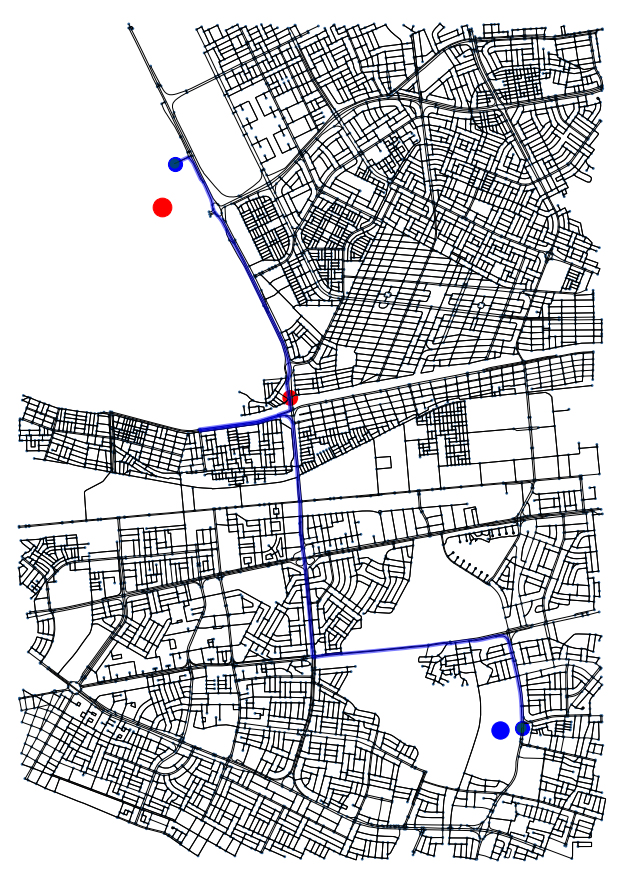

In [101]:
fig, ax = ox.plot_graph_route(G22, route, fig_height=16, 
                              fig_width=14, 
                              node_size=ns, node_color=nc,
                              show=False, close=False, 
                              edge_color='black',
                              orig_dest_node_color='green',
                              route_color='blue')

ax.scatter(G2.node[closest_node_to_ini1]['x'],
           G2.node[closest_node_to_ini1]['y'], 
           c='blue', s=200)
ax.scatter(G2.node[closest_node_to_des1]['x'],   
           G2.node[closest_node_to_des1]['y'], 
           c='blue', s=200)
ax.scatter(ini1[1], ini1[0], c='red', s=350)
ax.scatter(des1[1], des1[0], c='blue', s=300)
length = nx.shortest_path_length(G=G2, source=closest_node_to_ini1, target=closest_node_to_des1, weight='length')
print('Distancia >> ', round(length/1000,2), 'Km.')
fig.savefig("RCortaLimaAeropuertoInt.tiff", dpi=400, format="tiff")

In [ ]:
archivo.close()

# Evaluacion de tiempo y distancia para llegar desde un punto origen A a un destino B  

In [106]:
import WazeRouteCalculator
import time
region = 'EU'
origen = '-12.067911, -77.015611'
destino = '-12.081110, -76.944492'
route = WazeRouteCalculator.WazeRouteCalculator(origen, destino, region, log_lvl=None)
route_time, route_distance = route.calc_route_info()
h=int(route_time/60)
b = abs(route_time/60) - abs(int(route_time/60))
m=int(b*60)
print('R:Lima-Gamarra --> U.La Molina, Coordenadas Origen: ',from_address,' Destino: ', to_address )
print('El tiempo estimado es: ', h, 'horas ', m, ' minuntos')
print('La distancia estimada es: ', route_distance, 'Km')
archivo=open("Lista_Waze2.CSV","a")
archivo.write('R:Lima-Gamarra-U.La Molina')
archivo.write(",")
archivo.write(time.strftime("%H:%M:%S"))
archivo.write(",")
archivo.write(str(h))
archivo.write(",")
archivo.write(str(m))
archivo.write(",")
archivo.write(str(route_distance))
archivo.write(",")
archivo.write("\n")
print('Hora calculada>> ', time.strftime("%H:%M:%S"))

R:Lima-Gamarra --> U.La Molina, Coordenadas Origen:  -12.021144, -77.113573  Destino:  -12.068736, -77.077902
El tiempo estimado es:  0 horas  22  minuntos
La distancia estimada es:  14.304 Km
Hora calculada>>  16:11:12


In [113]:
import osmnx as ox
north, south, east, west = -12.061962,  -12.088720, -76.933027 , -77.020592
Gla = ox.graph_from_bbox(north, south, east, west, network_type='drive')
Gla2=ox.graph_from_bbox(north, south, east, west, network_type='drive') 

Ruta: Gamarra --> U. La Molina-Perú *Sin Interrupcion
Distancia>>  10.21


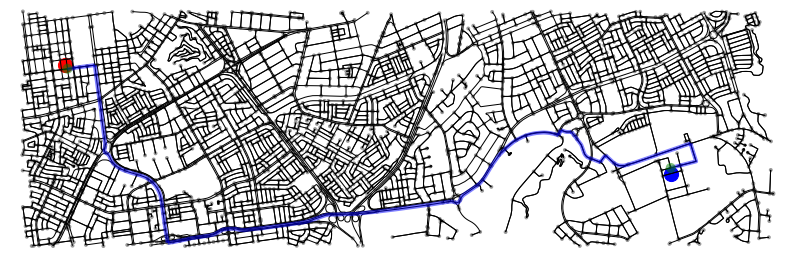

In [109]:
import networkx as nx
import numpy as np
import osmnx as ox
from sklearn.neighbors import KDTree
import folium
import matplotlib.pyplot as plt
print('Ruta: Gamarra --> U. La Molina-Perú *Sin Interrupcion')


ini1=ox.geocode(origen)
des1=ox.geocode(destino)

nodes, _ = ox.graph_to_gdfs(Gla)
nodes.head()
tree = KDTree(nodes[['y', 'x']], metric='euclidean')
ini_idx = tree.query([ini1], k=1, return_distance=False)[0]
dest_idx = tree.query([des1], k=1, return_distance=False)[0]
closest_node_to_ini = nodes.iloc[ini_idx].index.values[0]
closest_node_to_dest = nodes.iloc[dest_idx].index.values[0]
route = nx.shortest_path(Gla, closest_node_to_ini,
                       closest_node_to_dest)
                              
length = nx.shortest_path_length(G=Gla, source=closest_node_to_ini, target=closest_node_to_dest, weight='length')
print('Distancia>> ', round(length/1000,2))
fig, ax = ox.plot_graph_route(Gla, route, fig_height=16, 
                              fig_width=14, 
                              show=False, close=False, 
                              edge_color='black',
                              orig_dest_node_color='green',
                              route_color='blue')
ax.scatter(ini1[1], ini1[0], c='red', s=200)
ax.scatter(des1[1], des1[0], c='blue', s=200)

fig.savefig("RCortaGamarra_LaMolina_SI.tiff", dpi=400, format="tiff")
plt.show()


In [112]:
print(route)

[416152835, 4002838359, 4411708087, 4002838360, 416152834, 416152833, 416151083, 416151082, 416152843, 416152844, 416152842, 316629529, 416139474, 412191492, 412191432, 316635807, 316635222, 316635156, 316624803, 316625006, 1047198983, 1047198966, 4354604902, 3394788503, 1047198977, 392154191, 392154192, 316625017, 1841915496, 1841915498, 6128998296, 1047201580, 4022495044, 411307701, 263108188, 471581808, 316624764, 4022580203, 4022580205, 4022580206, 1641262430, 411307539, 2990124465, 1825885297, 182472511, 315562656, 315561470, 315562531, 315561471, 471580193, 315562314, 393867304, 393867121, 6302716440, 315563734, 315563777, 2619951875, 315563781, 315563754, 1024436939, 4214639805, 4214639819, 182472505, 182472504, 4373150260, 1024451911, 392155831, 4354338154, 1724989798, 392155819, 3738262366, 1042062060, 1042062051, 1042062108, 1042062124, 411672248, 411672433, 1042062086, 1273785231, 2972409512, 2105879834, 2972414546, 2972429191, 5712313480]


# Nueva ruta optima luego de interrumpir nodo color naranja

In [114]:
import networkx as nx

print('Ruta: Gamarra --> U. La Molina  *Con interrupcion en la *Intersección* color Azul')


ini1=ox.geocode(origen)
des1=ox.geocode(destino)

nodes, _ = ox.graph_to_gdfs(Gla)
nodes.head()
tree = KDTree(nodes[['y', 'x']], metric='euclidean')
ini_idx = tree.query([ini1], k=1, return_distance=False)[0]
dest_idx = tree.query([des1], k=1, return_distance=False)[0]
closest_node_to_ini = nodes.iloc[ini_idx].index.values[0]
closest_node_to_dest = nodes.iloc[dest_idx].index.values[0]

print('Origen>> ', ini1, ' Destino>> ', des1)
r=(182472505,0.45)
Gla.remove_nodes_from(r)


route = nx.shortest_path(Gla, closest_node_to_ini,
                       closest_node_to_dest)
length2 = nx.shortest_path_length(G=Gla, source=closest_node_to_ini, target=closest_node_to_dest, weight='length')
#save=True, filename='route', file_format='png', fig_height=10, fig_width=12, node_size=4, edge_color='k')
#nx.shortest_path_length
max_node=182472505
nc = ['r' if node==max_node else '#336699' for node in Gla2.nodes()]
ns = [250 if node==max_node else 8 for node in Gla2.nodes()]


Ruta: Gamarra --> U. La Molina  *Con interrupcion en la *Intersección* color Azul
Origen>>  (-12.0680229, -77.0155641)  Destino>>  (-12.0804403, -76.9450428)


Km:  10.78


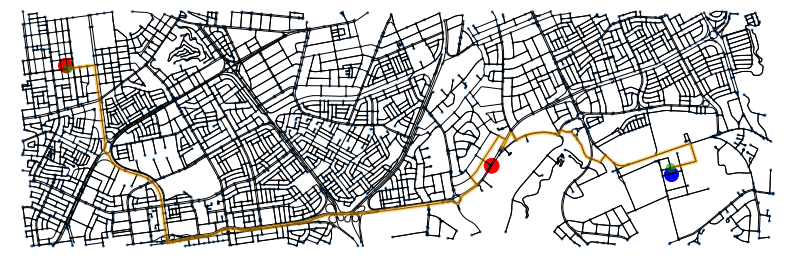

In [115]:
fig, ax = ox.plot_graph_route(Gla2, route, fig_height=16, 
                              fig_width=14, 
                              node_size=ns, node_color=nc,
                              show=False, close=False, 
                              edge_color='black',
                              orig_dest_node_color='green',
                              route_color='orange')
ax.scatter(ini1[1], ini1[0], c='red', s=200)
ax.scatter(des1[1], des1[0], c='blue', s=200)
print('Km: ', round(length2/1000,2))
fig.savefig("RCortaGamaMolinaci.tiff", dpi=400, format="tiff")

In [86]:
import sqlite3
from sqlite3 import Error
import json
import csv

PATH_DATABASE = "E:\\Sqlite\Tiempo.db"

def createTable(db_file):
    """ create a database connection to a SQLite database """
    try:
        conn = sqlite3.connect(db_file)
        c = conn.cursor()
        c.execute('''CREATE TABLE Ruta_T
             (Cuenca_Guayaquil, Quito_Ambato, Guayaquil_Machala, tiempo,km, fecha, hora)''')
        conn.commit()
    except Error as e:
        print(e)
    finally:
        conn.close()

createTable(PATH_DATABASE)

In [41]:
import networkx as nx
import osmnx as ox
edges = ox.graph_to_gdfs(Gla2, nodes=False, edges=True)

length = nx.shortest_path_length(G=Gla2, source=closest_node_to_ini, target=closest_node_to_dest, weight='length')
print('Distancia sin interrupcion de Nodo ',length/1000) 

Distancia sin interrupcion de Nodo  10.866719999999997


In [38]:
print(length)

10671.355


In [42]:
import networkx as nx
import osmnx as ox
edges = ox.graph_to_gdfs(Gla, nodes=False, edges=True)

length = nx.shortest_path_length(G=Gla, source=closest_node_to_ini, target=closest_node_to_dest, weight='length')
print('Distancia Luego de interrumpir un cruce de calle',length/1000)

Distancia Luego de interrumpir un cruce de calle 10.866719999999997
